# Лабораторная работа 2

## Линейная регрессия

### Метод наименьших квадратов: постановка задачи

Рассмотрим систему уравнений $Xa = y$, в которой $a$ — столбец неизвестных. Её можно переписать в векторном виде
$$x_1 a_1 + x_2 a_2 + \ldots + x_k a_k = y,$$
где $x_1,\ldots,x_k$ — столбцы матрицы $X$. Таким образом, решить исходную систему означает найти линейную комбинацию векторов $x_1,\ldots,x_k$, равную правой части. Но что делать, если такой линейной комбинации не существует? Геометрически это означает, что вектор $y$ не лежит в подпространстве $U = \langle x_1,\ldots, x_k\rangle$. В этом случае мы можем найти *псевдорешение*: вектор коэффициентов $\hat{a}$, для которого линейная комбинация $x_1 \hat{a}_1 + x_2 \hat{a}_2 + \ldots + x_k \hat{a}_k$ хоть и не равна в точности $y$, но является наилучшим приближением — то есть ближайшей к $y$ точкой $\hat{y}$ подпространства $U$ (иными словами, ортогональной проекцией $y$ на это подпростанство). Итак, цель наших исканий можно сформулировать двумя эквивалентными способами:

1. Найти вектор $\hat{a}$, для которого длина разности $|X\hat{a} - y|$ минимальна (отсюда название "метод наименьших квадратов");
2. Найти ортогональную проекцию $\hat{y}$ вектора $y$ на подпространство $U$ и представить её в виде $X\hat{a}$.

Далее мы будем предполагать, что векторы $x_1,\ldots,x_k$ линейно независимы (если нет, то сначала имеет смысл выделить максимальную линейно независимую подсистему).

На лекциях было показано, что проекция вектора $y$ на подпространство $U = \langle x_1,\ldots, x_k\rangle$, записывается в виде
$$\hat{y} = X\left(X^TX\right)^{-1}X^Ty,$$
и, соответственно, искомый вектор $\hat{a}$ равен
$$\hat{a} = \left(X^TX\right)^{-1}X^Ty.$$

### Задача линейной регрессии

Начнём с примера. Допустим, вы хотите найти зависимость среднего балла S студента ФКН от его роста H, веса W, длины волос L и N — количества часов, которые он ежедневно посвящает учёбе. Представьте, что мы измерили все эти параметры для $n$ студентов и получили наборы значений: $S_1,\ldots, S_n$, $H_1,\ldots, H_n$ и так далее.

Тут можно подбирать много разных умных моделей, но начать имеет смысл с самой простой, линейной:
$$S = a_1H + a_2W + a_3L + a_4N + a_5.$$
Конечно, строгой линейной зависимости нет (иначе можно было бы радостно упразднить экзамены), но мы можем попробовать подобрать коэффициенты $a_1, a_2, a_3, a_4, a_5$, для которых отклонение правой части от наблюдаемых было бы наименьшим:
$$\sum_{i=1}^n\left(S_i - ( a_1H_i + a_2W_i + a_3L_i + a_4N_i + a_5)\right)^2 \longrightarrow \min$$
И сразу видно, что мы получили задачу на метод наименьших квадратов! А именно, у нас
$$X =
\begin{pmatrix}
H_1 & W_1 & L_1 & N_1 & 1\\
H_2 & W_2 & L_2 & N_2 & 1\\
\dots & \dots & \dots & \dots & \dots \\
H_n & W_n & L_n & N_n & 1
\end{pmatrix},\qquad y=
\begin{pmatrix}
S_1\\ S_2\\ \vdots \\ S_n
\end{pmatrix}$$

Решая эту задачу с помощью уже известных формул, получаем оценки коэффициентов $\hat{a}_i$ ($i = 1\ldots,5$).

Теперь проговорим общую постановку задачи линейной регрессии. У нас есть $k$ переменных $x_1,\ldots,x_k$ ("регрессоров"), через которые мы хотим выразить "объясняемую переменную" $y$:
$$y = a_1x_1 + a_2x_2 + \ldots + a_kx_k$$
Значения всех переменных мы измерили $n$ раз (у $n$ различных объектов,  в $n$ различных моментов времени - это зависит от задачи). Подставим эти данные в предыдущее равенство:
$$\begin{pmatrix}
y_1\\ y_2 \\ \vdots \\ y_n
\end{pmatrix} = 
a_1\begin{pmatrix}
x_{11} \\ x_{21} \\ \vdots \\ x_{n1} \end{pmatrix} + a_2\begin{pmatrix}
x_{12} \\ x_{22} \\ \vdots \\ x_{n2} \end{pmatrix} + \ldots + a_k\begin{pmatrix}
x_{1k} \\ x_{2k} \\ \vdots \\ x_{nk} \end{pmatrix}$$
(здесь $x_{ij}$ - это значение $j$-го признака на $i$-м измерении). Это удобно переписать в матричном виде:
$$\begin{pmatrix}
x_{11} & x_{12} & \ldots & x_{1k}\\
x_{21} & x_{22} & \ldots & x_{2k}\\
\dots & \dots & \dots & \dots\\
x_{n1} & x_{n2} & \ldots & x_{nk}
\end{pmatrix} \cdot
\begin{pmatrix}
a_1 \\ a_2 \\ \vdots \\ a_k
\end{pmatrix} = 
\begin{pmatrix}
y_1 \\ y_2 \\ \vdots \\ y_n
\end{pmatrix}$$
или коротко $Xa = y$. Поскольку на практике эта система уравнений зачастую не имеет решения (ибо зависимости в жизни редко бывают действительно линейными), методом наименьших квадратов ищется псевдорешение.

### Оценка качества. Обучение и тест 

После того, как вы построили регрессию и получили какую-то зависимость объясняемой переменной от регрессоров, настаёт время оценить качество регрессии. Есть много разных функционалов качества; мы пока будем говорить только о самом простом и очевидном из них: о среднеквадратичной ошибке (mean square error). Она равна
$$\frac1{n}|X\hat{a} - y|^2 = \frac1{n}\sum_{i=1}^n\left(\hat{a}_1x_{i1} + \hat{a}_2x_{i2} + \ldots + \hat{a}_kx_{ik} - y_i\right)^2$$

В целом, хочется искать модели с наименьшей mean square error на имеющихся данных. Однако слишком фанатичная гонка за минимизацией ошибки может привести к печальным последствиям, в чём Вам предстоит убедиться в ходе выполнения этой лабораторной.

Чтобы не попадать в эту ловушку, данные обычно делят на обучающие (по которым строят модель и оценивают коэффициенты) и тестовые. Лучшей стоит счесть ту модель, для которой значение функционала качества будет меньше.

### Правила оформления графиков
При работе с данными часто неудобно делать какие-то выводы, если смотреть на таблицу и числа в частности, поэтому важно уметь визуализировать данные. 

У matplotlib, конечно же, есть [документация](https://matplotlib.org/users/index.html) с большим количеством [примеров](https://matplotlib.org/examples/), но для начала достаточно знать про несколько основных типов графиков:
- plot — обычный поточечный график, которым можно изображать кривые или отдельные точки;
- hist — гистограмма, показывающая распределение некоторой величины;
- scatter — график, показывающий взаимосвязь двух величин;
- bar — столбцовый график, показывающий взаимосвязь количественной величины от категориальной.

Ещё одна билиотека для визуализации: [seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html). Это настройка над matplotlib, иногда удобнее и красивее делать визуализации через неё. 

При выполнении этой лабораторной Вы столкнётесь с необходимость рисовать большое количество графиков. Не забывайте про базовые принципы построения приличных графиков:
- оси должны быть подписаны, причём не слишком мелко;
- у графика должно быть название;
- если изображено несколько графиков, то необходима поясняющая легенда;
- для точек из разных выборок, необходимо использовать разные цвета;
- все линии на графиках должны быть чётко видны (нет похожих цветов или цветов, сливающихся с фоном);
- если отображена величина, имеющая очевидный диапазон значений (например, проценты могут быть от 0 до 100), то желательно масштабировать ось на весь диапазон значений (исключением является случай, когда вам необходимо показать малое отличие, которое незаметно в таких масштабах).

Помните, что проверяющий имеет право снизить оценку за неопрятные графики.

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-02-linregr-Username.ipynb, где Username — Ваша фамилия.

### Задание 1. Метод наименьших квадратов (3 балла)

Скачайте файлы ``train.txt`` и ``test.txt``. В первом из них находится обучающая выборка, а во втором — тестовая. Каждый из файлов содержит два столбца чисел, разделённых пробелами: в первом — $n$ точек (значения аргумента $x$), во втором — значения некоторой функции $y = f(x)$ в этих точках, искажённые случайным шумом. Ваша задача — по обучающей выборке подобрать функцию $y = g(x)$, пристойно приближающую неизвестную вам зависимость.

Загрузим обучающие и тестовые данные (не забудьте ввести правильный путь!).

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as sla
import sklearn

In [37]:
data_train = np.loadtxt('train.txt', delimiter=',')
data_test = np.loadtxt('test.txt', delimiter=',')

**0. [0 баллов]** Разделим значения $x$ и $y$

In [38]:
X_train = data_train[:,0]
y_train = data_train[:,1]

X_test = data_test[:,0]
y_test = data_test[:,1]

**1. [0.1 балла]** Найдите с помощью метода наименьших квадратов линейную функцию ($y = kx + b$), наилучшим образом приближающую неизвестную зависимость. Полезные функции: ``numpy.ones(n)`` для создания массива из единиц длины $n$ и ``numpy.concatenate((А, В), axis=1)`` для слияния двух матриц по столбцам (пара ``А`` и ``В`` превращается в матрицу ``[A B]``). Напечатайте этот многочлен в виде $kx+b$.

In [39]:
def pseudosol(A, y):
    AT = np.transpose(A)
    return np.dot(np.dot(np.linalg.inv(np.dot(AT, A)), AT), y_train)

n = X_train.shape[0]
X = X_train.reshape((n, 1))

A = np.concatenate((X, np.ones((n, 1))), axis = 1)
AT = np.transpose(A)
kb = pseudosol(A, y_train)

k = kb[0]
b = kb[1]
print("y = ", k, "x + ", b, sep="")

y = 2.27913449805195x + 4.433230905064935


**2. [0.15 балла]** Нарисуйте на плоскости точки $(x_i, y_i)$ из обеих выборок и полученную линейную функцию.

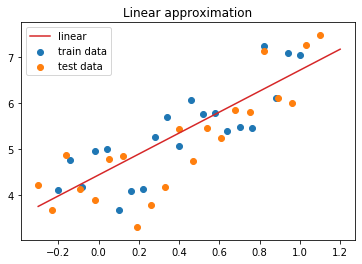

In [40]:
x = np.linspace(-0.3, 1.2, 100)

plt.scatter(X_train, y_train, label='train data')
plt.scatter(X_test, y_test, label='test data')
plt.plot(x, x * k + b, 'C3', label='linear')
plt.title("Linear approximation")
plt.legend()

**3. [0.15 балла]** Глядя на данные, подумайте, многочленом какой степени можно было бы лучше всего приблизить эту функцию с точки зрения минимизации среднеквадратичной ошибки на обучающей выборке. Найдите этот многочлен и напечатайте его в виде $a_0 + a_1 x + \ldots a_k x^k$.

In [41]:
k = 5;
n = X_train.shape[0]
X = X_train.reshape((n, 1))

A = np.ones((n, 1))

for i in range (1, k + 1):
    A = np.concatenate((A, np.power(X, i)), axis = 1)

polynom = pseudosol(A, y_train)

print("y = ", polynom[0], end='', sep = '')
for i in range(1, polynom.shape[0]):
    if (polynom[i] < 0):
        print(' - ', end='')
    else:
        print(' + ', end='')
    print(np.abs(polynom[i]), 'x', end='', sep = '')
    if (i != 1):
        print('^', i, end='', sep = '')

y = 4.431297813827996 - 0.1305980398675337x + 3.274714401776599x^2 + 21.374796276399223x^3 - 51.1314813855754x^4 + 29.524978041429065x^5

**4. [0.1 балла]** Нарисуйте его график на одном чертеже вместе с точками $(x_i, y_i)$ из обеих выборок.

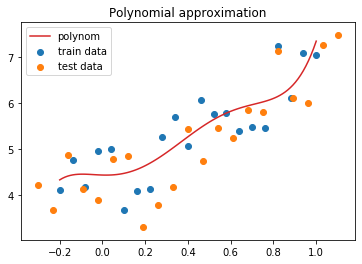

In [42]:
def polynomial_approx(x, polynom):
    res = 0
    for i in range(0, polynom.shape[0]):
        res += polynom[i] * (x ** i)
    return res

x = np.linspace(-0.2, 1.0, 100)

plt.scatter(X_train, y_train, label='train data')
plt.scatter(X_test, y_test, label='test data')
plt.plot(x, polynomial_approx(x, polynom), 'C3', label='polynom')
plt.title("Polynomial approximation")
plt.legend()

**5. [0.25 балла]** Для $k = 1,2,3,\ldots,10$ найдите многочлен $\hat{f}_k$ степени $k$, наилучшим образом приближающий неизвестную зависимость. Напечатайте найденные многочлены в виде $a_0 + a_1 x + \ldots a_k x^k$.

In [43]:
polynoms = []
polynoms.append([0])
rng = range(1, 11)

for k in rng:
    n = X_train.shape[0]
    X = X_train.reshape((n, 1))

    A = np.ones((n, 1))

    for i in range (1, k + 1):
        A = np.concatenate((A, np.power(X, i)), axis = 1)
        
    polynoms.append(pseudosol(A, y_train))

    print("y =", polynoms[k][0], end='')
    for i in range(1, polynoms[k].shape[0]):
        if (polynoms[k][i] < 0):
            print(' - ', end='')
        else:
            print(' + ', end='')
        print(np.abs(polynoms[k][i]), 'x', end='', sep = '')
        if (i != 1):
            print('^', i, end='', sep = '')
    print()

y = 4.433230905064935 + 2.2791344980519463x
y = 4.472476503404162 + 1.1578316883597481x + 1.4016285121152738x^2
y = 4.460736355285147 + 1.0650161052851068x + 1.8597508372609308x^2 - 0.38176860428818316x^3
y = 4.341166120399635 + 1.1718023926318055x + 6.7940917843605035x^2 - 13.051328119988625x^3 + 7.918474697311261x^4
y = 4.431297813827996 - 0.1305980398675337x + 3.274714401776599x^2 + 21.374796276399223x^3 - 51.1314813855754x^4 + 29.524978041429065x^5
y = 4.383795010921297 - 4.597179326193927x + 16.002903993368363x^2 + 121.25709712788569x^3 - 481.5101328853108x^4 + 581.453298243842x^5 - 229.97013341870002x^6
y = 4.44451270934287 - 4.0088959024654045x + 7.215458559885491x^2 + 119.35078431892x^3 - 314.23117234873587x^4 + 122.87821664144394x^5 + 238.69936824799606x^6 - 167.3819648855183x^7
y = 4.663789110119307 - 5.182773429096918x - 26.695632423834578x^2 + 268.86044390602393x^3 + 109.8956783422816x^4 - 3132.856466418936x^5 + 6760.628613413113x^6 - 5701.710314683662x^7 + 1729.47760903049

**6. [1 балл]** Для каждого из них найдите среднеквадратическую ошибку на обучающих данных и на тестовых данных: $\frac1{n}\sum_{i=1}^n\left( \hat{f}_k(x_i) - y_i \right)^2$ (в первом случае сумма ведётся по парам $(x_i, y_i)$ из обучающих данных, а во втором — по парам из тестовых данных).

In [44]:
def polynomial_loss(X, y, polynom):
    res = 0
    n = X.shape[0]
    for i in range(0, n):
        res += (polynomial_approx(X[i], polynom) - y[i]) ** 2
        
    return res / n
    
print("Test data")
for i in rng:
    print("k = ", i, ", loss = ", polynomial_loss(X_train, y_train, polynoms[i]), sep = '') 
    
print("Train data")

polynomial_losses = [10000]
for i in rng:
    polynomial_losses.append(polynomial_loss(X_test, y_test, polynoms[i]))
    print("k = ", i, ", loss = ", polynomial_losses[i], sep = '')
print()


Test data
k = 1, loss = 0.29689663326251964
k = 2, loss = 0.2696989158766913
k = 3, loss = 0.269497187147961
k = 4, loss = 0.26106653305792726
k = 5, loss = 0.24998504648317513
k = 6, loss = 0.18829348988370612
k = 7, loss = 0.1853962115329439
k = 8, loss = 0.15905556579089053
k = 9, loss = 0.15847184274751358
k = 10, loss = 0.15316611003109412
Train data
k = 1, loss = 0.4351202004048878
k = 2, loss = 0.35647628878312543
k = 3, loss = 0.3553464571518395
k = 4, loss = 0.44172701892854427
k = 5, loss = 0.5579732021788699
k = 6, loss = 2.5816929325226377
k = 7, loss = 2.5157829074244904
k = 8, loss = 4.357288863017028
k = 9, loss = 4.77634194007967
k = 10, loss = 14.632412163020712



**7. [0.75 балла]** Для $k = 1,2,3,4,6$ нарисуйте графики полученных многочленов на одном чертеже вместе с точками $(x_i, y_i)$ из обеих выборок (возможно, график стоит сделать побольше; это делается командой `plt.figure(figsize=(width, height))`).

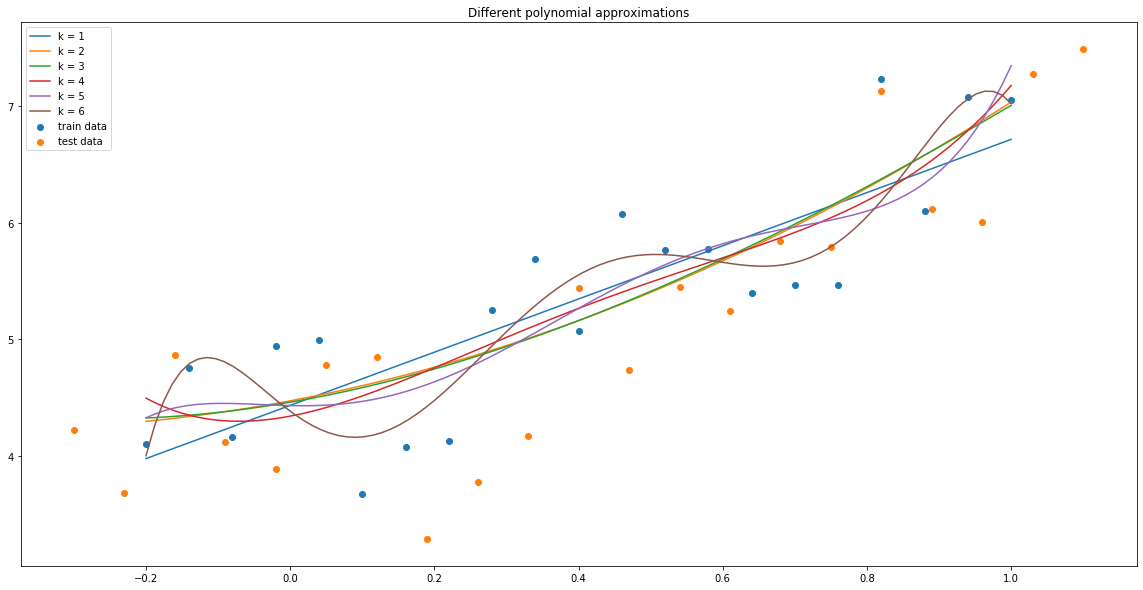

In [45]:
plt.figure(figsize=(20, 10))
x = np.linspace(-0.2, 1.0, 100)

plt.scatter(X_train, y_train, label='train data')
plt.scatter(X_test, y_test, label='test data')

for i in range(1, 7):
    str_label = "k = " + str(i)
    plt.plot(x, polynomial_approx(x, polynoms[i]), label = str_label)
plt.title("Different polynomial approximations")
plt.legend()

**8. [0.5 балла]** Что происходит с ошибкой при росте степени многочлена? Казалось бы, чем больше степень, тем более сложным будет многочлен и тем лучше он будет приближать нашу функцию. Подтверждают ли это ваши наблюдения? Как вам кажется, чем объясняется поведение ошибки на тестовых данных при $k = 10$? Как называется наблюдаемый Вами эффект?

При увеличении степени многочлена он действительно начинает все точнее приближать функцию, то есть, среднеквадратическая ошибка на train_data уменьшается, что мы и видим. Однако, при слишком высоких степенях, наша модель настолько сильно приближается к train_data, что на нее начинает влиять шум, добавленный к тренировочной выборке. Когда мы запускаем модель на тестовой выборке, где шум уже другой, модель выдает худший результат из-за этого влияния, что мы и видим: начиная с $k= 6$ ошибка на test_data стремительно растет. Этот эффект называется переобучением. Проще говоря: модель начинает приближать не искомую функцию, а какую-то другую, на которую был наложен шум

### Задание 2. Линейная регрессия (3.5 балла)

Скачайте файлы ``flats_moscow_mod.txt`` и ``flats_moscow_description.txt``. В первом из них содержатся данные о квартирах в Москве. Каждая строка содержит шесть характеристик некоторой квартиры, разделённые знаками табуляции; в первой строке записаны кодовые названия характеристик. Во втором файле приведены краткие описания признаков.

In [46]:
data_flats = np.loadtxt('flats_moscow_mod.txt',skiprows=1)
print(data_flats)

desc = [];
with open('flats_moscow_mod.txt') as f:
    desc = f.readline().split()
for i in range(0, len(desc)):
    desc[i] = desc[i][1:-1]
del desc[0]

print(desc)

[[ 83.   64.   42.    9.   17.   10. ]
 [107.   67.   41.    9.   12.5  10. ]
 [160.  101.   51.   15.    7.    7. ]
 ...
 [ 81.   56.   39.    6.   11.5  10. ]
 [115.   77.   50.    9.    6.   10. ]
 [112.   73.   51.    8.   10.5   7. ]]
['totsp', 'livesp', 'kitsp', 'dist', 'metrdist']


**0. [0 баллов]** Разделите выборку на обучающую и тестовую. Делать это лучше случайным образом (ведь вы не знаете, как создатели датасета упорядочили объекты); рекомендуем вам для этого функцию `sklearn.model_selection.train_test_split` с параметром `test_size=0.3`. Не забудьте зафиксировать параметр `random_state`.

In [47]:
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(data_flats, test_size=0.3, random_state=42)

X_train = data_train[:,1:]
y_train = data_train[:,0]

X_test = data_test[:,1:]
y_test = data_test[:,0]

print(X_train)
print(y_train)

[[74.  44.  11.  13.   5. ]
 [60.  40.   8.  13.5  5. ]
 [67.  42.   9.   7.5  3. ]
 ...
 [54.  37.   6.  14.5 10. ]
 [66.  40.   8.  12.5  5. ]
 [67.  44.   9.  11.5 10. ]]
[107.  90. 215. ...  73. 105. 110.]


**1. [0.5 балла]** Вашей задачей будет построить с помощью метода наименьших квадратов (линейную) зависимость между ценой квартиры и остальными доступными параметрами. С помощью известных Вам формул найдите регрессионные коэффициенты. Выпишите построенную модель.

In [48]:
def print_linear_model(lin, param):
    print(lin[0], end='', sep='')
    print(param[0], end='', sep='')
    for i in range(1, len(lin)):
        if (lin[i] >= 0):
            print(' + ', end = '', sep = '')
        else:
            print(' - ', end = '', sep = '')
        print(abs(lin[i]), end='', sep='')
        if (i != len(lin) - 1):
            print(param[i], end='', sep='')
            
n = X_train.shape[0]
m = X_train.shape[1]
X = X_train.reshape((n, m))

A = np.concatenate((X, np.ones((n, 1))), axis = 1)
AT = np.transpose(A)
lin = pseudosol(A, y_train)

print('price = ', end = '', sep = '')
print_linear_model(lin, desc)

price = 1.5949749963768376totsp + 1.0603389771036735livesp + 2.0690499134350793kitsp - 3.4119895138227907dist - 1.386121531919376metrdist - 8.100900294760866

**2. [0.25 балла]** Какой смысл имеют их знаки? Согласуются ли они с вашими представлениями о жизни?

Знаки при параметрах totsp, livesp и kitsp - это '+', а при параметрах dist и metrdist - '-'. Получается вполне логично, т.к. квартира тем дороже, чем больше площадь комнат и площадь самой квартиры, а также чем ближе она к центру и к метро - следовательно, чем меньше расстояния до них dist и metdist соответственно. Последний параметр - константа b, ее знак мало о чем говорит

**3. [0.25 балла]** Оцените качество приближения, вычислив среднеквадратическую ошибку на тестовой выборке.

In [49]:
def linear_approx(x, lin):
    res = lin[-1]
    for i in range(0, lin.shape[0] - 1):
        res += lin[i] * x[i]
        
    return res

def linear_loss(X, lin, y):
    res = 0
    n = X.shape[0]
    for i in range(0, n):
        res += (linear_approx(X[i], lin) - y[i]) ** 2
        
    return res / n
    
print("Train data")
print("loss = ", linear_loss(X_train, lin, y_train), sep = '')
print()

print("Test data")
print("loss = ", linear_loss(X_test, lin, y_test), sep = '') 

Train data
loss = 790.3953564279122

Test data
loss = 1226.7814210409736


### Усложнение модели

Конечно, никто не гарантирует, что объясняемая переменная (цена квартиры) зависит от остальных характеристик именно линейно. Зависимость может быть, например, квадратичной или логарифмической; больше того, могут быть важны не только отдельные признаки, но и их комбинации. Это можно учитывать, добавляя в качестве дополнительных признаков разные функции от уже имеющихся характеристик: их квадраты, логарифмы, попарные произведения.

В этом задании Вам нужно постараться улучшить качество модели, добавляя дополнительные признаки, являющиеся функциями от уже имеющихся. Но будьте осторожны: чрезмерное усложнение модели будет приводить к переобучению.

**4. [0.25 балла]** Опишите признаки, которые Вы решили добавить. Объясните, чем был мотивирован выбор именно этих признаков.

Хочу добавить квадратные корни из всех признаков и квадраты всех признаков. Я хочу добавить именно эти степени, т.к. по моему мнению, другие степени или нестепенные функции выглядят неестественными. Это скорее мои догадки, но можно это проверить

**5. [2 балла]** Постройте с помощью метода наименьших квадратов (линейную) зависимость между ценой квартиры и новыми признаками. С помощью известных Вам формул найдите регрессионные коэффициенты. Выпишите построенную модель.

In [50]:
n = X_train.shape[0]
m = X_train.shape[1]
X = X_train.reshape(n, m)
A = np.copy(X)

n1 = X_test.shape[0]
m1 = X_test.shape[1]
X1 = X_test.reshape(n1, m1)
A1 = np.copy(X1)

new_desc = desc.copy()
for i in range(0, m):
    A = np.concatenate((A, np.power(X[:,i].reshape(n, 1), 0.5)), axis = 1)
    A1 = np.concatenate((A1, np.power(X1[:,i].reshape(n1, 1), 0.5)), axis = 1)
    new_desc.append(new_desc[i] + '^0.5')
for i in range(0, m):
    A = np.concatenate((A, np.power(X[:,i].reshape(n, 1), 2)), axis = 1)
    A1 = np.concatenate((A1, np.power(X1[:,i].reshape(n1, 1), 2)), axis = 1)
    new_desc.append(new_desc[i] + '^2')
    
A = np.concatenate((A, np.ones((n, 1))), axis = 1)
A1 = np.concatenate((A1, np.ones((n1, 1))), axis = 1)
AT = np.transpose(A)


new_lin = np.dot(np.dot(np.linalg.inv(np.dot(AT, A)), AT), y_train)

print('price = ', end = '', sep = '')
print_linear_model(new_lin, new_desc)

price = -0.1607505499236188totsp - 86.16023143482256livesp + 15.994982188765096kitsp - 39.816721013550726dist + 6.984128225525617metrdist + 13.372585063388016totsp^0.5 + 774.4255720089702livesp^0.5 - 49.29259799242949kitsp^0.5 + 136.67704814247557dist^0.5 - 36.854433142245355metrdist^0.5 + 0.004917176117404498totsp^2 + 0.3178264736569218livesp^2 - 0.2609069263641553kitsp^2 + 0.6857813234722143dist^2 - 0.08340346779985225metrdist^2 - 1987.7781869129294

**6. [0.25 балла]** Оцените качество приближения, вычислив среднеквадратическую ошибку на тестовой выборке.

In [51]:
print("Train data")
print("loss = ", linear_loss(A, new_lin, y_train), sep = '')
print()

print("Test data")
print("loss = ", linear_loss(A1, new_lin, y_test), sep = '') 

Train data
loss = 711.4138576307338

Test data
loss = 809.0731911873364


Как видно по уменьшившейся ошибке, мое предположение о степенях 2 и 1/2 вполне работает

### Задание 3. Регуляризация (3.5 балла)

Вспомним, что задача линейной регрессии формулируется как задача нахождения проекции вектора значений объясняемой переменной $y$ на линейную оболочку $\langle x_1,\ldots,x_k\rangle$ векторов значений регрессоров. Если векторы $x_1,\ldots,x_k$ линейно зависимы, то матрица $X^TX$ вырожденна и задача не будет решаться с помощью приведённой выше формулы. В жизни, по счастью, различные признаки редко бывают *в точности* линейно зависимы, однако во многих ситуациях они скоррелированы и становятся "почти" линейно зависимыми. Таковы, к примеру, зарплата человека, его уровень образования, цена машины и суммарная площадь недвижимости, которой он владеет. В этом случае матрица $X^TX$ будет близка к вырожденной, и это приводит к численной неустойчивости и плохому качеству решений; как следствие, будет иметь место переобучение. Один из симптомов этой проблемы — необычно большие по модулю компоненты вектора $a$.

Есть много способов борьбы с этим злом. Один из них - регуляризация. Сейчас мы рассмотрим одну из её разновидностей — **L2-регуляризацию**. Идея в том, чтобы подправить матрицу $X^TX$, сделав её "получше". Например, это можно сделать, заменив её на $(X^TX + \lambda E)$, где $\lambda > 0$ — некоторый скаляр. Пожертвовав точностью на обучающей выборке, мы тем не менее получаем численно более стабильное псевдорешение $a = (X^TX + \lambda E)^{-1}X^Ty$ и снижаем эффект переобучения. *Гиперпараметр* $\lambda$ нужно подбирать, и каких-то универсальных способов это делать нет, но зачастую можно его подобрать таким, чтобы ошибка на тестовой выборке падала.

Однако есть некоторые правила, которых стоит придерживаться при подборе коэффициента регуляризации. Обычно в такой ситуации всю выборку делят на три части: обучающую, *валидационную* и тестовую. Сначала по валидационной подбирают значение гиперпараметра, потом по обучающей строят модель, а по тестовой оценивают её итоговое качество. Кроме того, подбирать $\lambda$ нужно по логарифметической сетке, чтобы узнать оптимальный порядок величины.

**1. [0.25 балла]** Почему не стоит подбирать коэффициент регуляризации по обучающей выборке? По тестовой выборке?

Если подбирать коэффициент по обучающей выборке, то опять же, на модель может оказать влияние наложенный шум (мы стремимся минимизировать ошибку на обучающей выборке). По тестовой выборке подбирать коэффициент нельзя, потому что теряется смысл тестовой выборки - на ней тестируется уже готовая модель и она никак не должна на модель влиять.

**2. [0 баллов]** Теперь давайте вспомним первую задачу. Если Вы её сделали, то помните, что ошибка аппроксимации многочленом шестой степени довольно высокая. Попытаемся использовать регуляризацию при построении модели. Поделите обучающую выборку из первой задачи на две части, одну из которых объявите обучающей, а другую — валидационной (будьте осторожны при выборе `train_size`, в этой выборке не так много данных).

In [53]:
data_train = np.loadtxt('train.txt', delimiter=',')
data_test = np.loadtxt('test.txt', delimiter=',')

data_train, data_valid = train_test_split(data_train, test_size=0.5, random_state=111)

X_train = data_train[:,0]
y_train = data_train[:,1]

X_valid = data_valid[:,0]
y_valid = data_valid[:,1]

X_test = data_test[:,0]
y_test = data_test[:,1]

print(X_train)
print(X_valid)
print(X_test)

[ 0.4   0.94  0.7   0.88  0.22  0.28 -0.08  0.34  0.52  1.  ]
[-0.02  0.1   0.58  0.46  0.64  0.82  0.16  0.04  0.76 -0.2  -0.14]
[-0.3  -0.23 -0.16 -0.09 -0.02  0.05  0.12  0.19  0.26  0.33  0.4   0.47
  0.54  0.61  0.68  0.75  0.82  0.89  0.96  1.03  1.1 ]


**3. [0.75 балла]** Убедитесь, что, используя регуляризацию с хорошо подобранным коэффициентом $\lambda$, ошибку на тестовой выборке можно сделать не больше, чем для многочлена оптимальной степени в модели без регуляризации.

In [54]:
def pseudosol_l2reg(A, y, l):
    AT = np.transpose(A)
    E = np.diag(np.ones(A.shape[1]))
    return np.dot(np.dot(np.linalg.inv(np.dot(AT, A) + E * l), AT), y_train)


k = 6;
n = X_train.shape[0]
X = X_train.reshape((n, 1))

A = np.ones((n, 1))

for i in range (1, k + 1):
    A = np.concatenate((A, np.power(X, i)), axis = 1)

lmbd = np.logspace(-5, 5, num = 100)
lmbd = np.insert(lmbd, 0, 0, axis=0)

lmbd_losses = []

zero_polynom = pseudosol(A, y_train)
zero_loss = polynomial_loss(X_valid, y_valid, zero_polynom)

min_loss = zero_loss;
min_lmbd = 0;
min_polynom = []

for l in lmbd:
    polynom = pseudosol_l2reg(A, y_train, l)
    cur_loss = polynomial_loss(X_valid, y_valid, polynom)
    
    if (cur_loss < min_loss):
        min_loss = cur_loss
        min_lmbd = l
        min_polynom = polynom
        
    lmbd_losses.append(cur_loss)
    
print("without regularization : loss =", min(polynomial_losses))
print("with regularization : loss =", polynomial_loss(X_test, y_test, min_polynom), "lambda =", min_lmbd)

without regularization : loss = 0.3553464571518395
with regularization : loss = 0.3430602290459362 lambda = 0.08697490026177834


**4. [0.25 балла]** Для этого $\lambda$ сравните $\det(X^TX)$ и $\det(X^TX + \lambda E)$. Чем можно объяснить такой результат?

In [55]:
AT = np.transpose(A)
print("without regularization :", np.linalg.det(np.dot(AT, A)))
print("with regularization :", np.linalg.det(np.dot(AT, A) + np.diag(np.ones(A.shape[1])) * min_lmbd))

without regularization : 4.969061257785103e-17
with regularization : 0.0019036409413306973


Наверное, в $X^TX$ были столбцы или строки, близкие к линейно зависимым, из-за чего определитель получался очень мал по модулю. Когда мы добавили к этой матрице $\lambda E$ эта проблема устранилась. Когда мы берем обратную матрицу к этой, то ее определитель равен обратному к исходному, то есть, он получается очень большой по модулю, следовательно, в получившейся матрице будут большие по модулю числа, что влечет ошибки в вычислениях и как следствие - большую ошибку на тестовых данных.

**5. [0.25 балла]** Нарисуйте на одном чертеже графики многочленов шестой степени, приближающих неизвестную функцию, для модели с регуляризацией и без.

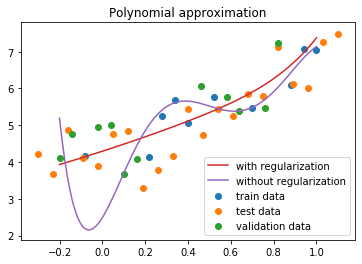

In [56]:
x1 = np.linspace(-0.1, 1.0, 100)
x2 = np.linspace(-0.25, 1.05, 100)

plt.scatter(X_train, y_train, label='train data')
plt.scatter(X_test, y_test, label='test data')
plt.scatter(X_valid, y_valid, label='validation data')
plt.plot(x, polynomial_approx(x2, min_polynom), 'C3', label='with regularization')
plt.plot(x, polynomial_approx(x1, zero_polynom), 'C4', label='without regularization')
plt.title("Polynomial approximation")
plt.legend()

**6. [0.25 балла]** Чем первый из них выгодно отличается от второго?

Регуляризованный многочлен более плавный, в то время как многочлен без регуляризации сильно колеблется и, как видно из графика, переобучен, т.к. повторяет траекторию именно синих точек, а не точек в целом

**7. [0.75 балла]** Пусть заданы $X\in \text{Mat}_{n \times k}(\mathbb{R})$, $\lambda \geqslant 0$, а также известно, что $\text{rk}~X = k \leqslant n$. Решите следующую задачу оптимизации:
$$|Xa - y|^2 + \lambda|a|^2\rightarrow\min\limits_{a \in \mathbb{R}^k}.$$

\begin{align*}
   |Xa - y|^2 + \lambda |a|^2 &= (Xa - y)^T(Xa - y) + \lambda a^T a = \\ &=
   (a^TX^T - y^T)(Xa - y) + \lambda a^T a = \\ &=
   a^TX^TXa - y^TXa - a^TX^Ty + y^Ty + \lambda a^T a = \\ &=
   a^T(X^TX + \lambda E)a + y^Ty - 2y^TXa 
\end{align*}

Поскольку $a^TX^Ty$ и $y^TXa$ - скаляры, $a^TX^Ty = (a^TX^Ty)^T = y^TXa$. Обоначим теперь $b = y^TX$, $A = (X^TX + \lambda E)$, $a = (X^TX + \lambda E)^{-1}X^Ty + d = A^{-1}b^T + d$. Заметим также, что $A$ - симметрична, следовательно $A^T = A$, $(A^{-1})^T = A^{-1}$, кроме того $bd$ - скаляр, следовательно, $bd = (bd)^T = d^Tb^T$

\begin{align*}
   |Xa - y|^2 + \lambda |a|^2 &= \ldots = 
   (A^{-1}b^T + d)^TA(A^{-1}b^T + d) + y^Ty - 2b(A^{-1}b^T + d) = \\ &=
   (d^T + b(A^{-1})^T)A(A^{-1}b^T + d) + y^Ty - 2bA^{-1}b^T - 2bd = \\ &=
   (d^TA + bA^{-1}A)(A^{-1}b^T + d) + y^Ty - 2bA^{-1}b^T - 2bd = \\ &=
   (d^TA + b)(A^{-1}b^T + d) + y^Ty - 2bA^{-1}b^T - 2bd = \\ &=
   d^Tb^T +bA^{-1}b^T + d^TAd + bd + y^Ty - 2bA^{-1}b^T - 2bd = \\ &=
   d^TAd + y^Ty - bA^{-1}b^T = \\ &=
   d^T(X^TX + \lambda E) d + y^Ty - bA^{-1}b^T = \\ &=
   d^TX^TXd + d^T\lambda E d + y^Ty - bA^{-1}b^T = \\ &=
   (Xd)^TXd + \lambda d^T d + y^Ty - bA^{-1}b^T
\end{align*}

В этом выражении $y^Ty - bA^{-1}b^T = const$, надо минимизировать $(Xd)^TXd + \lambda d^T d = |Xd|^2 + \lambda|d|^2 \geq 0$. Равенство достигается при $d = \vec{0}$ (при любых других значениях $|Xd| = |X^{(1)}d_1 + X^{(2)}d_2 + \ldots + X^{(k)}d_k| > 0$, поскольку столбцы матрицы $X$ линейно независимы, их линейная комбинация равна 0 только с нулевыми коэффициентами) следовательно $a = (X^TX + \lambda E)^{-1}X^Ty$. 

Интуитивно это можно понимать так: мы ищем компромисс между минимизацией длины разности $|Xa - y|$ (то есть точностью решения задачи регрессии) и тем, чтобы компоненты вектора $a$ не становились слишком большими по модулю.

**8. [0.25 балла]** Почему регуляризовать (штрафовать за слишком большую абсолютную величину) коэффициент при константном признаке (который состоит из одних единиц) — плохая идея?

Можно привести пример, когда коэффициент при константном признаке должен быть большой: точки расположены вблизи прямой $y = x + 1000$, где $-1 < x < 1$. Тогда наши точки как бы сдвинуты вверх относительно начала координат, и хорошим решением будет ликвидировать сдвиг вычитанием большой константы.

**9. [0.5 балла]** Пусть теперь $\text{rk}~X < k$. Всегда ли в этом случае существует решение? Если существует, то является ли оно единственным? Ответ обоснуйте.

Если $\lambda > 0$, то решение единственное, $a = (X^TX + \lambda E)^{-1}X^Ty$, при других $d$ слагаемое $\lambda |d|^2 > 0$. \\ 
Если $\lambda = 0$, то подходят любое $d$, такое что $Xd = 0$. Поскольку ранг $X$ меньше $k$, столбцы  $X$ линейно зависимы, и для некоторого $i$ 
$$
    X^{(i)} = \alpha_1X^{(1)} + \ldots + \alpha_{i-1}X^{(i-1)} + \alpha_{i+1}X^{(i+1)} + \ldots + \alpha_{k}X^{(k)}
$$
Возьмем $d = (\alpha_1 \cdot \mu, \ldots, \alpha_{i-1} \cdot \mu, -\mu, \alpha_{i+1} \cdot \mu,  \ldots, \alpha_{k} \cdot\mu)$. Тогда 
\begin{align}
    Xd &= \alpha_1\mu X^{(1)} + \ldots + \alpha_{i-1}\mu X^{(i-1)} - \mu X^{(i-1)}+ \alpha_{i+1}\mu X^{(i+1)} + \ldots + \alpha_k\mu X^{(k)} = \\ &=
    \mu \left(\alpha_1X^{(1)} + \ldots + \alpha_{i-1}X^{(i-1)} + \alpha_{i+1}X^{(i+1)} + \ldots + \alpha_{k}X^{(k)} - X^{(i)}\right) = \mu \cdot 0 = 0
\end{align}
Получаем бесконечно много решений вида $a =  (X^TX + \lambda E)^{-1}X^Ty + (\alpha_1 \cdot \mu, \ldots, \alpha_{i-1} \cdot \mu, -\mu, \alpha_{i+1} \cdot \mu, \ldots, \alpha_{k} \cdot\mu)$, где $\mu \in \mathbb{R}$. \\

Вывод: если $\lambda > 0$ есть ровно одно решение, если $\lambda = 0$, то решений бесконечно много

**10. [0.25 балла]** Покажите, что если решений бесконечно много, то среди них обязательно найдутся решения со сколь угодно большими по модулю компоненты вектора $a$. Почему большие веса в линейной модели — плохо?

Если решений бесконечно много, то среди них есть решения вида $a =  (X^TX + \lambda E)^{-1}X^Ty + (\alpha_1 \cdot \mu, \ldots, \alpha_{i-1} \cdot \mu, -\mu, \alpha_{i+1} \cdot \mu, \ldots, \alpha_{k} \cdot\mu)$, а поскольку $\mu$ может быть сколь угодно большой, то одна из координат вектора, а следовательно, и его модуль, может быть сколь угодно большой. Большие веса плохо работают в линейной модели, т.к. страдает точность вычислений из-за того, что в мантиссу числа входит ограниченное количество цифр

### Задание 4. Онлайн-обучение линейной регрессии (3 балла)

Раньше мы работали в ситуации, когда объекты $x_i$ и значения $y_i$ даны с самого начала и всегда доступны. Допустим теперь, что пары $(x_i, y_i)$ поступают к нам по одной, и мы не можем себе позволить хранить их все в памяти (это может быть актуально, например, если Вы пытаетесь обучить модель на устройстве со сравнительно небольшим количеством оперативной памяти: скажем, на мобильном телефоне или на бортовом компьютере спутника связи). В этом случае нам нужно уметь решать следующую задачу:

**Известно:** решение задачи регрессии для датасета $(x_1, y_1),\ldots,(x_t,y_t)$;

**На вход поступает:** новая пара $(x_{t+1}, y_{t+1})$;

**Требуется:** быстро (за время, не зависящее от $t$) отыскать решение задачи регрессии для расширенного датасета $(x_1, y_1),\ldots,(x_t,y_t),(x_{t+1}, y_{t+1})$.

Обозначим $X_{(t)} = (x_1\ldots x_t)^T$ и $y_{(t)} = (y_1,\ldots,y_t)^T$. Тогда, как мы хорошо помним, решение задачи регрессии для датасета $(x_1, y_1),\ldots,(x_t,y_t)$ имеет вид $\hat{a}_{(t)} = \left(X^T_{(t)}X_{(t)}\right)^{-1}X^T_{(t)}y_{(t)}$. Размеры матриц $X^T_{(t)}X_{(t)}$ и $X^T_{(t)}y_{(t)}$ не зависят от $t$, поэтому их мы, пожалуй, можем себе позволить хранить в памяти.

**1. [1 балл]** И вот Ваше первое задание в этом разделе: придумайте алгоритм, принимающий на вход матрицы $X^T_{(t)}X_{(t)}$ и $X^T_{(t)}y_{(t)}$, а также пару $(x_{t+1}, y_{t+1})$ и вычисляющий матрицы $X^T_{(t+1)}X_{(t+1)}$ и $X^T_{(t+1)}y_{(t+1)}$. Сложность вашего алгоритма не должна зависеть от $t$.

\begin{align}
X_{(t)}^TX_{(t)} &= \sum\limits_{i=1}^n\sum\limits_{j=1}^n\sum\limits_{k=1}^{t}
(X_{(t)}^T)_{ik}\cdot(X_{(t)})_{kj} = 
\sum\limits_{i=1}^n\sum\limits_{j=1}^n\sum\limits_{k=1}^{t} x_{ki} \cdot x_{kj} \\
X_{(t + 1)}^TX_{(t + 1)} &= 
\sum\limits_{i=1}^n\sum\limits_{j=1}^n\sum\limits_{k=1}^{t+1} x_{ki} \cdot x_{kj}  = 
\sum\limits_{i=1}^n\sum\limits_{j=1}^n\sum\limits_{k=1}^{t} x_{ki} \cdot x_{kj}  + 
\sum\limits_{i=1}^n\sum\limits_{j=1}^n x_{(t+1)i} \cdot x_{(t+1)j} = \\ &=
X_{(t)}^TX_{(t)} + x_{t+1}x_{t+1}^T
\end{align}

Предполагается, что $y_i \in \mathbb{R}$, т.к. ранее было написано, что $y$ - это некоторые значения

\begin{align}
X_{(t)}^Ty_{(t)} &= \sum\limits_{i=1}^n\sum\limits_{k=1}^{t}
(X_{(t)}^T)_{ik}\cdot(y_{(t)})_{k} = 
\sum\limits_{i=1}^n\sum\limits_{k=1}^{t} x_{ki} \cdot y_{k} \\
X_{(t + 1)}^Ty_{(t + 1)} &=
\sum\limits_{i=1}^n\sum\limits_{k=1}^{t+1} x_{ki} \cdot y_{k} = 
\sum\limits_{i=1}^n\sum\limits_{k=1}^{t} x_{ki} \cdot y_{k} + 
\sum\limits_{i=1}^n x_{(t+1)i} \cdot y_{(t+1)} = \\ &=
x_{t+1}y_{t+1}
\end{align}

Получаем формулы $X_{(t + 1)}^TX_{(t + 1)} = X_{(t)}^TX_{(t)} + x_{t+1}^2$ и $ X_{(t + 1)}^Ty_{(t + 1)} = X_{(t)}^Ty_{(t)} + x_{t+1}y_{t+1}$

Поскольку мы умножаем матрицы фиксированного размера, алгоритм линеен по времени

**2. [2 балла]** Теперь настало время написать немного кода и порисовать красивые картинки. Вам нужно будет реализовать симуляцию онлайн-обучения регрессии для задачи приближения функции (в данном случае $f_{true}(x) = 2x\sin(5x) + x^2 - 1$; все значения искажены небольшим нормальным шумом) многочленом степени не выше 5.

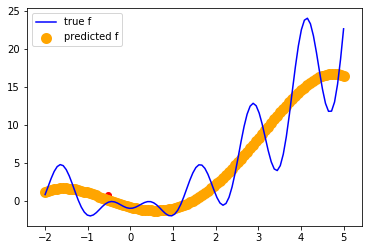

In [57]:
from IPython.display import clear_output

f_true = lambda x: 2*x*np.sin(5*x) + x**2 - 1 # this is the true function

# We need this to make the plot of f_true:
x_grid = np.linspace(-2,5,100) # 100 linearly spaced numbers
x_grid_enl = np.hstack((x_grid.reshape((100,1))**j for j in range(6)))
y_grid = f_true(x_grid)

n = 5

XTX = np.zeros((n, n))
XTY = np.zeros((n, 1))

for i in range(200):

    x_new = np.random.uniform(-2, 5)
    y_new = f_true(x_new) + 2*np.random.randn()
    
    X = np.zeros((n, 1))
    for i in range(0, n):
        X[i] = x_new ** i
    
    XTX += np.dot(X, np.transpose(X))
    XTY += X * y_new
    
    # the rest of code is just bells and whistles
    if (i+5)%1==0:
        clear_output(True)
        plt.plot(x_grid,y_grid, color='blue', label='true f')
        plt.scatter(x_new, y_new, color='red')
        
        polynom = np.dot(np.linalg.inv(XTX), XTY)
        y_pred = []
        
        for x in x_grid:
            X = np.zeros((1, n))
            for i in range(0, n):
                X[0][i] = x ** i
            y_pred.append(np.dot(X, polynom))
            
        plt.scatter(x_grid, y_pred, color='orange', linewidth=5, label='predicted f')
        
        plt.legend(loc='upper left')
        plt.show()

### Добавление. QR-разложение

**QR-разложением** матрицы $A$ (не обязательно квадратной) мы будем называть её представление в виде $A = QR$, где $Q$ — матрица с ортонормированными столбцами, а $R$ - верхнетреугольная матрица.

Смысл QR-разложения следующий. Пусть $a_1,\ldots,a_m$ — столбцы матрицы $A$, $q_1,\ldots,q_t$ — столбцы матрицы $Q$. Тогда $q_1,\ldots,q_t$ — это ортонормированный базис в подпространстве, являющемся линейной оболочкой векторов $a_1,\ldots,a_m$, а в матрице $R$ записаны коэффициенты, с помощью которых $a_i$ выражаются через $q_1,\ldots,q_t$.

Находить QR-разложение заданной матрицы можно разными способами. Мы познакомим Вас не с самым лучшим из них, но по крайней мере с наиболее простым концептуально. Заметим, что ортогональный базис линейной оболочки можно найти с помощью ортогонализации Грама-Шмидта. При этом коэффициенты из матрицы $R$ получаются в качестве побочного продукта этого процесса:

```python
for j = 1...n:
    q_j = a_j
    for i = 1,...,j-1:
        r_ij = (q_i, a_j)
        q_j = q_j - r_ij * q_i
    r_jj = |q_j|
    if r_jj == 0: # a_j in <a_1,...,a_j-1>
        # What would you do in this case?..
    q_j = q_j / r_jj
```

Для нахождения QR-разложения Вы можете использовать библиотечную функцию `scipy.linalg.qr`.

Поскольку лабораторная про линейную регрессию, не так-то просто замять вопрос о том, какое же отношение QR-разложение имеет к задаче регрессии. Упомянем одно из возможных применений.

Допустим, мы нашли QR-разложение матрицы $X$, а именно: $X = QR$. Тогда
$$X^TX = (QR)^T(QR) = R^TQ^TQR = R^TR$$

Поскольку в задаче регрессии матрица $X$ обычного полного ранга (то есть её столбцы линейно независимы), матрица $R$ будет квадратной. Благодаря этому нашу обычную формулу для набора регрессионных коэффициентов $\hat{a}$ можно переписать в следующем виде:

$$\hat{a} = (X^TX)^{-1}X^Ty = (R^TR)^{-1}(QR)^Ty = R^{-1}(R^T)^{-1}R^TQ^Ty = R^{-1}Q^Ty$$

Как видите, формула стала проще. Более того, зачастую обращение матрицы $R$ может быть численно более устойчиво, чем обращение матрицы $X^TX$.